The NEISSCodingManual mentions that all patients under 2 years old are assigned with a code representing their age in months. We will therefore modify their age to `1` (1yo) for better visualisation.

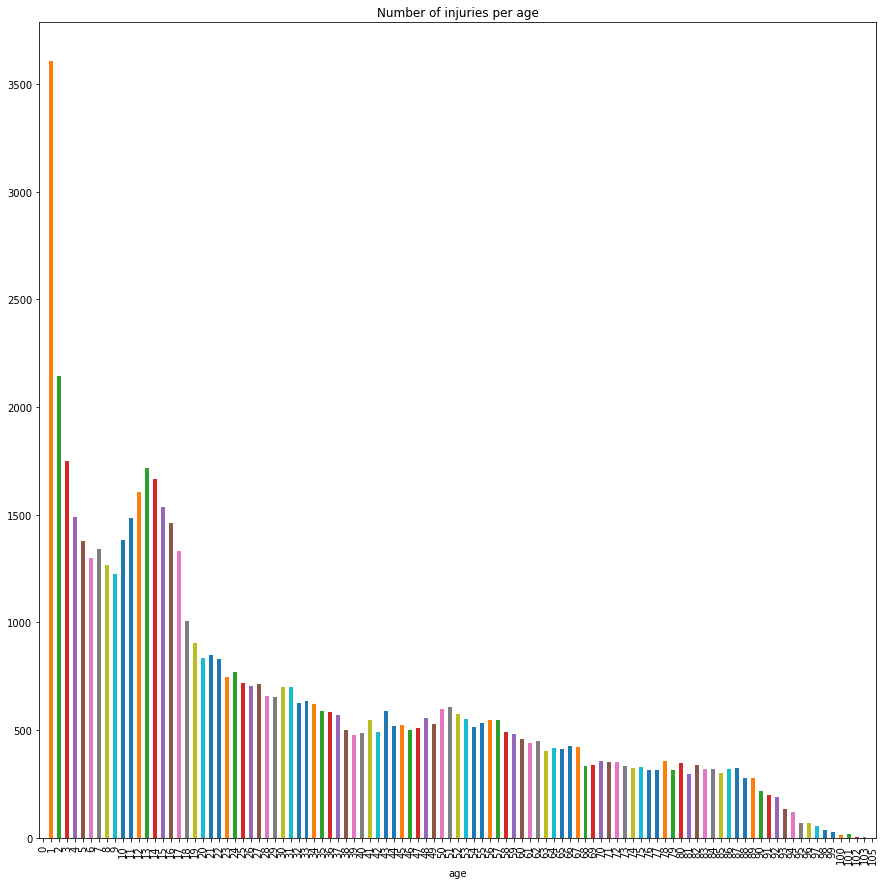

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))


def check_age(age):
    if age > 200:
        return 1
    else:
        return age


neiss_df = pd.read_csv('NEISS2014.csv')
diag_df = pd.read_csv('DiagnosisCodes.csv')
bp_df = pd.read_csv('BodyParts.csv')

# Add DiagnosisCodes data to NEISS dataframe
neiss_df = pd.merge(neiss_df, diag_df, left_on='diag', right_on='Code')

# Add bodyParts data to NEISS dataframe
neiss_df = pd.merge(neiss_df, bp_df, left_on='body_part', right_on='Code')

# Convert all ages in months < 2yo to 1yo
neiss_df['age'] = neiss_df['age'].apply(check_age)


# Visualize Number of injuries per patients age
neiss_df.groupby('age').size().plot.bar(title='Number of injuries per age');


We can see that the number of reported injuries generally decreases with age.

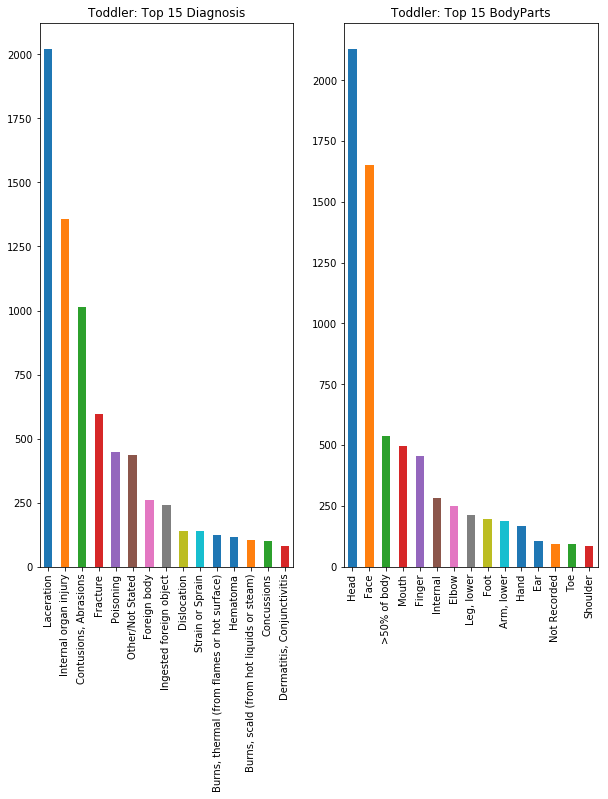

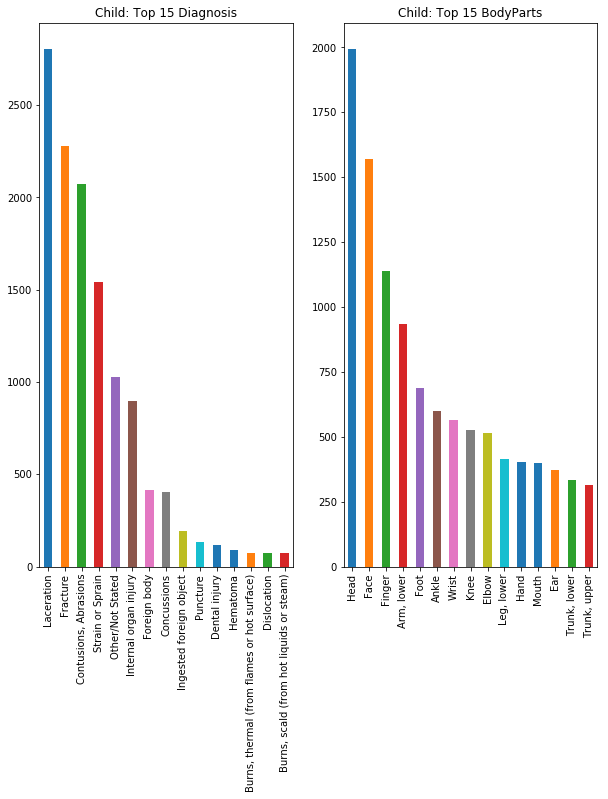

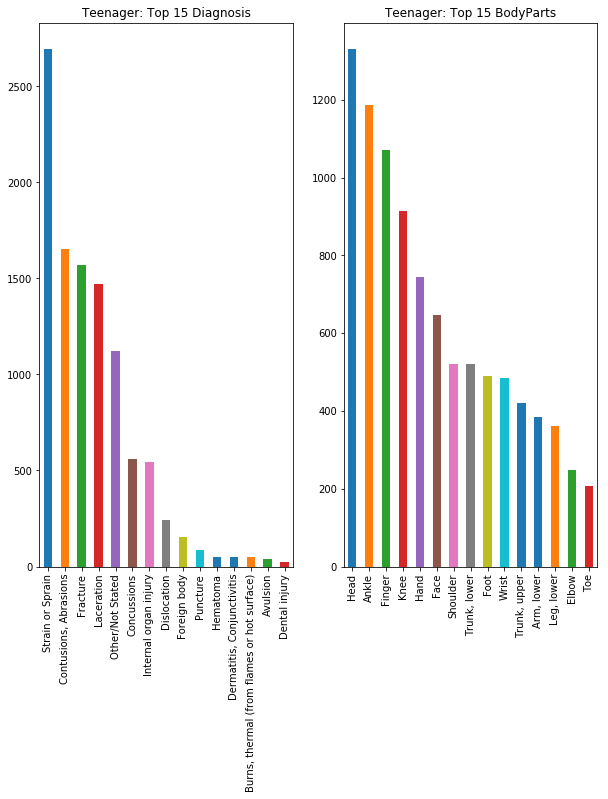

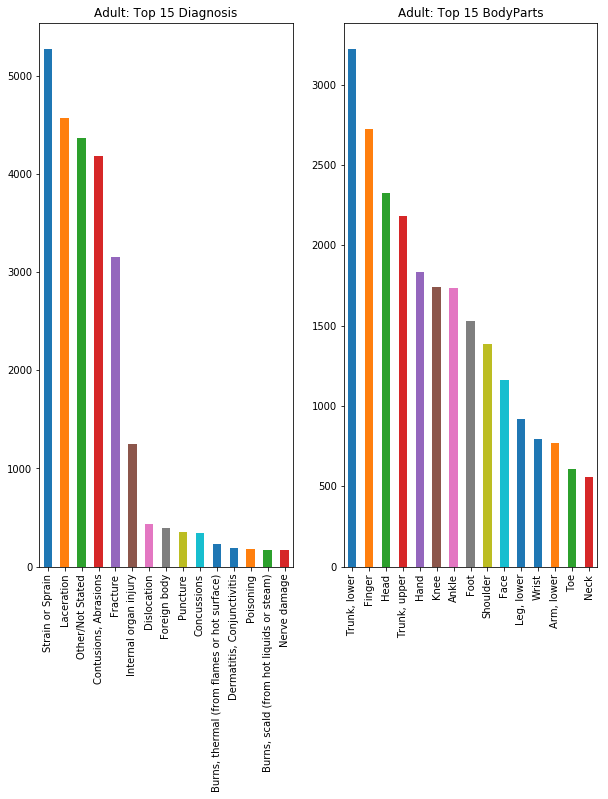

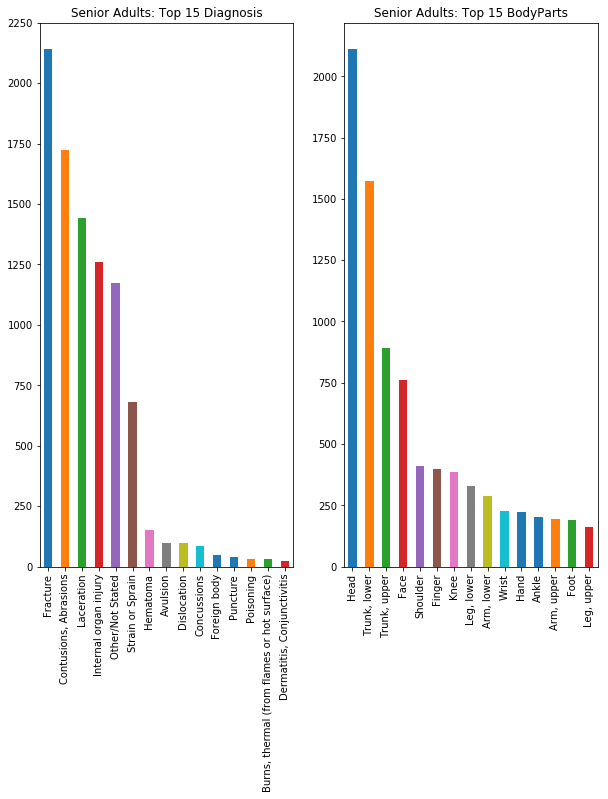

In [101]:
# Create age group column to seperate patients into age groups
age_group_names = ["Toddler", "Child", "Teenager", "Adult", "Senior Adults"]
neiss_df['age_group'] = pd.cut(neiss_df['age'], [0, 3, 12, 20, 65, 110], labels=age_group_names)


# Let's get the top15 diagnosis and reported BodyParts per age group
# We can create graphs dynamically by iterating over age_group_names
for ag_name in age_group_names:
    gf_df = neiss_df.loc[neiss_df['age_group'] == ag_name]
    fig, axs = plt.subplots(1, 2)
    gf_df['Diagnosis'].value_counts()[:15].plot(kind='bar', title="%s: Top 15 Diagnosis" % ag_name, ax=axs[0], figsize=(10,10))
    gf_df['BodyPart'].value_counts()[:15].plot(kind='bar', title="%s: Top 15 BodyParts" % ag_name, ax=axs[1], figsize=(10,10))

# Results


Infants between the age of 1 to 12 are often diagnosed with Lacerations. The most likely affected body part being th head.

Teenagers and Young Adults are most often diagnosed with Strains/Sprains.

Senior Adults are more prone to fractures and abrasions to the head, trunk and face (probably due to falls).